In [2]:
from plotting import *
from matplotlib import pyplot as plt

from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense
from keras.models import Model

import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
mat_contents = sio.loadmat('mnist.mat')
x = mat_contents['fea']
y = mat_contents['gnd']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(56000, 784) train samples
(14000, 784) test samples


In [4]:
# Normalize features
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [4]:
def create_autoencoder(num_features, encoding_dim=50, learning_rate=0.01):
    input_img = Input(shape=(num_features,))
    encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
    decoded = Dense(num_features, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    decoder_layer = autoencoder.layers[-1]
    
    encoded_input = Input(shape=(encoding_dim,))
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    optimizer_adam = Adam(lr=learning_rate)
    autoencoder.compile(optimizer=optimizer_adam, loss='binary_crossentropy')
    
#     optimizer_SGD = SGD(lr=learning_rate, momentum=0.25)
#     autoencoder.compile(optimizer=optimizer_SGD, loss='binary_crossentropy')
    
    return encoder, decoder, autoencoder

**1. Choose a decent Learning Rate and Report Convergence.**

In [5]:
# Settings for Autoencoder
nb_epoch = 10
learning_rate = 0.001 # recommended default for adam in keras
num_features = X_train.shape[1]

In [8]:
encoding_dim = 50 
encoder, decoder, autoencoder = create_autoencoder(num_features, encoding_dim, learning_rate)

AE_50 = autoencoder.fit(X_train, X_train,
                nb_epoch=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(X_train, X_train))
               

Train on 56000 samples, validate on 56000 samples
Epoch 1/10
56000/56000 [==============================] - 5s - loss: 0.3203 - val_loss: 0.2673
Epoch 2/10
56000/56000 [==============================] - 5s - loss: 0.2654 - val_loss: 0.2643
Epoch 3/10
56000/56000 [==============================] - 4s - loss: 0.2629 - val_loss: 0.2608
Epoch 4/10
56000/56000 [==============================] - 4s - loss: 0.2577 - val_loss: 0.2545
Epoch 5/10
56000/56000 [==============================] - 4s - loss: 0.2506 - val_loss: 0.2463
Epoch 6/10
56000/56000 [==============================] - 5s - loss: 0.2416 - val_loss: 0.2370
Epoch 7/10
56000/56000 [==============================] - 4s - loss: 0.2323 - val_loss: 0.2271
Epoch 8/10
56000/56000 [==============================] - 5s - loss: 0.2211 - val_loss: 0.2153
Epoch 9/10
56000/56000 [==============================] - 5s - loss: 0.2101 - val_loss: 0.2052
Epoch 10/10
56000/56000 [==============================] - 5s - loss: 0.2013 - val_loss: 0.1977

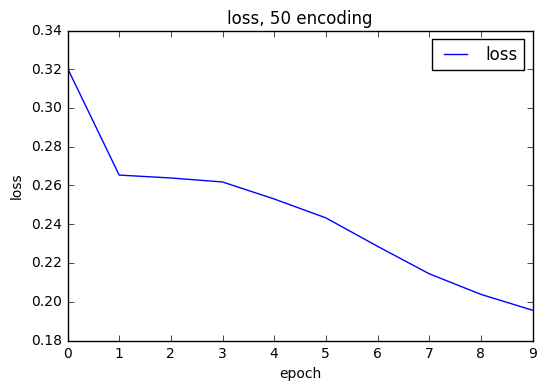

In [8]:
plot_loss(models=[AE_50], legend=['loss'], title='loss, 50 encoding')

**2. Report the behavior (Loss Curve) with varying number of Hidden units (say 50,100) and intuitively discuss the results. **


In [24]:
encoding_dim = 100  

encoder, decoder, autoencoder = create_autoencoder(num_features, encoding_dim, learning_rate)

AE_100 = autoencoder.fit(X_train, X_train,
                nb_epoch=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(X_train, X_train))
               
# score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)

Train on 56000 samples, validate on 56000 samples
Epoch 1/10
56000/56000 [==============================] - 6s - loss: 0.1015 - val_loss: 0.0052
Epoch 2/10
56000/56000 [==============================] - 5s - loss: -0.0076 - val_loss: -0.0191
Epoch 3/10
56000/56000 [==============================] - 7s - loss: -0.0301 - val_loss: -0.0425
Epoch 4/10
56000/56000 [==============================] - 6s - loss: -0.0558 - val_loss: -0.0702
Epoch 5/10
56000/56000 [==============================] - 7s - loss: -0.0839 - val_loss: -0.0985
Epoch 6/10
56000/56000 [==============================] - 6s - loss: -0.1130 - val_loss: -0.1286
Epoch 7/10
56000/56000 [==============================] - 6s - loss: -0.1438 - val_loss: -0.1599
Epoch 8/10
56000/56000 [==============================] - 7s - loss: -0.1752 - val_loss: -0.1911
Epoch 9/10
56000/56000 [==============================] - 6s - loss: -0.2057 - val_loss: -0.2208
Epoch 10/10
56000/56000 [==============================] - 5s - loss: -0.2344 -

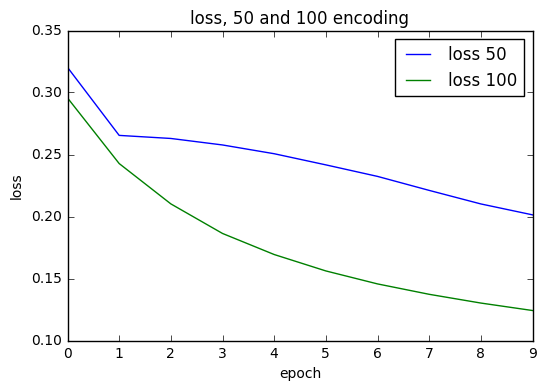

In [11]:
plot_loss(models=[AE_50, AE_100], legend=['loss 50', 'loss 100'], title='loss, 50 and 100 encoding')

**3. Add some noise to the input and compare the behavior with the previous one.**

In [5]:
# define noise [0,1]
noise = 0.1
x_noise = np.random.normal(0,1,x.shape) + x

# Normalize features
X_train, X_test, y_train, y_test = train_test_split(x_noise, y, test_size=0.2, random_state=0)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train.shape,X_test.shape

((56000, 784), (14000, 784))

In [14]:
encoding_dim = 50  
encoder, decoder, autoencoder = create_autoencoder(num_features, encoding_dim, learning_rate)

AE_noise = autoencoder.fit(X_train, X_train,
                nb_epoch=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(X_train, X_train))

Train on 56000 samples, validate on 56000 samples
Epoch 1/10
56000/56000 [==============================] - 5s - loss: 0.1819 - val_loss: 0.0354
Epoch 2/10
56000/56000 [==============================] - 5s - loss: 0.0164 - val_loss: 0.0042
Epoch 3/10
56000/56000 [==============================] - 6s - loss: -0.0026 - val_loss: -0.0088
Epoch 4/10
56000/56000 [==============================] - 5s - loss: -0.0141 - val_loss: -0.0197
Epoch 5/10
56000/56000 [==============================] - 5s - loss: -0.0255 - val_loss: -0.0318
Epoch 6/10
56000/56000 [==============================] - 5s - loss: -0.0385 - val_loss: -0.0460
Epoch 7/10
56000/56000 [==============================] - 5s - loss: -0.0534 - val_loss: -0.0612
Epoch 8/10
56000/56000 [==============================] - 5s - loss: -0.0685 - val_loss: -0.0762
Epoch 9/10
56000/56000 [==============================] - 5s - loss: -0.0836 - val_loss: -0.0915
Epoch 10/10
56000/56000 [==============================] - 5s - loss: -0.0992 - v

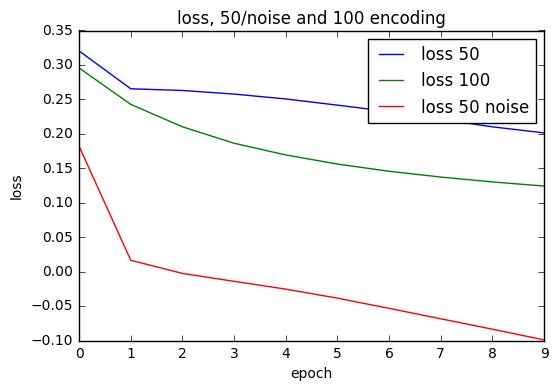

In [16]:
plot_loss(models=[AE_50, AE_100, AE_noise], legend=['loss 50', 'loss 100', 'loss 50 noise'], title='loss, 50/noise and 100 encoding')

**4. Visualize the learnt weights.**

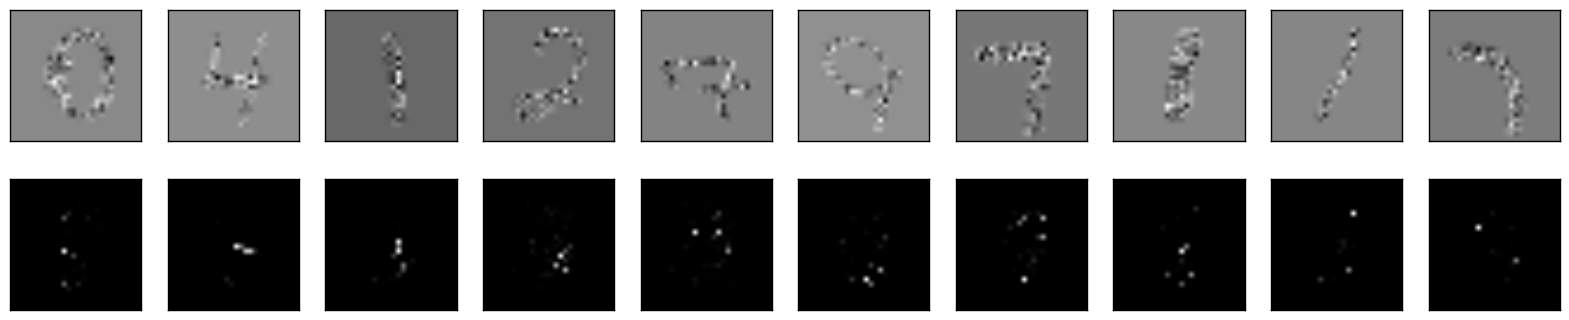

In [25]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

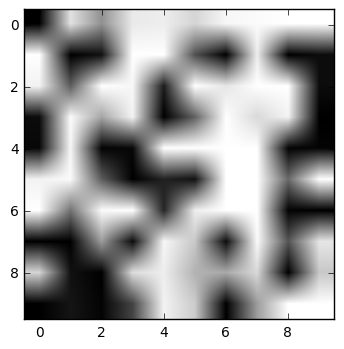

In [47]:
from PIL import Image
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
#       x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    x = x.reshape((10, 10)) 
    return Image.fromarray(x)

img = encoded_imgs[0]
img = deprocess_image(img)
# img.show()
plt.imshow(img)
plt.show()

# imsave('%s_filter_%d.png' % (layer_name, filter_index), img)